In [2]:
import pandas as pd #Mengimport Library
import matplotlib.pyplot as plt #Mengimport Library
%matplotlib inline
import seaborn as sns #Mengimport Library
df = pd.read_csv('Mall_Customers.csv')  #Mengconvert DataSet ke DataFrame
df.head(3) #Melihat Informasi Mengenai Data 3 Baris Pertama

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [20]:
#Melakukan Preprocessing Untuk Mengubah Nama Kolom
df = df.rename(columns={'Gender':'gender','Age':'age',
                        'Annual Income (k$)':'annual_income',
                        'Spending Score (1-100)':'spending_score'})
#Mengubah Data Ketegorik Menjadi Data Numerik
#df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
#Melihat Informasi Mengenai Data Yang Telah di Preprocessing
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Text(0, 0.5, 'Inertia')

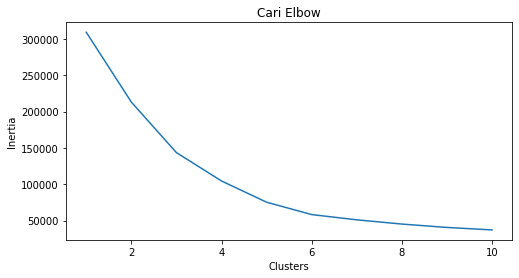

In [29]:
from sklearn.cluster import KMeans
#Menghilangkan Kolom CustomerID dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)
#Membuat List Inertia dengan nilai K antara 1 sampai 11
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)
#Membuat Plot Inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

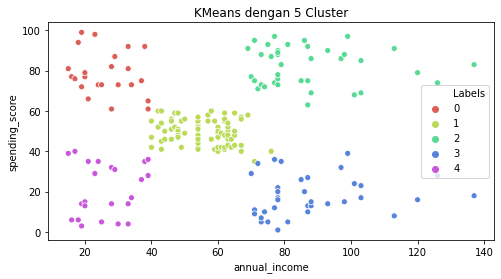

In [30]:
#Membuat Objek KMeans
km5 = KMeans(n_clusters=5).fit(X)
#Menambahkan Kolom Label pada DataSet
X['Labels'] = km5.labels_
#Membuat Plot KMeans dengan 5 Kluster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()